In [4]:
import pandas as pd
import os


In [5]:
csv_path = "olist_customers_dataset.csv"  # Update this with your actual file name

# Check if the file exists
if os.path.exists(csv_path):
    print("File found! Loading data...")
    df = pd.read_csv(csv_path)
    display(df.head())  # Preview first 5 rows
else:
    print("File not found! Check the filename and path.")


File found! Loading data...


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Check column names and data types
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [7]:
df.info()  # Column types and missing values
df.describe()  # Summary statistics
df.head()  # Preview first 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
print("Total rows:", df.shape[0])
print("Unique customer IDs:", df['customer_id'].nunique())

# Check for duplicate customer IDs
duplicates = df[df.duplicated(subset=['customer_id'], keep=False)]
print("Duplicate customers found:", duplicates.shape[0])


Total rows: 99441
Unique customer IDs: 99441
Duplicate customers found: 0


C:\Users\suman\AppData\Local\Temp\ipykernel_164\1889759032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['customer_state'], order=df['customer_state'].value_counts().index, palette="viridis")


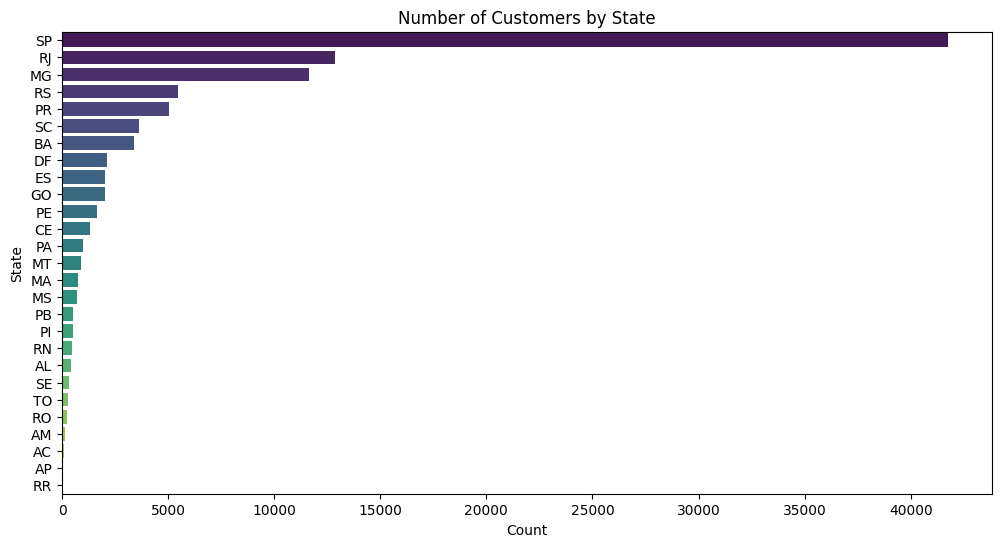

In [9]:
# Customer Distribution by State
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=df['customer_state'], order=df['customer_state'].value_counts().index, palette="viridis")
plt.title("Number of Customers by State")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_164\4052703500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")


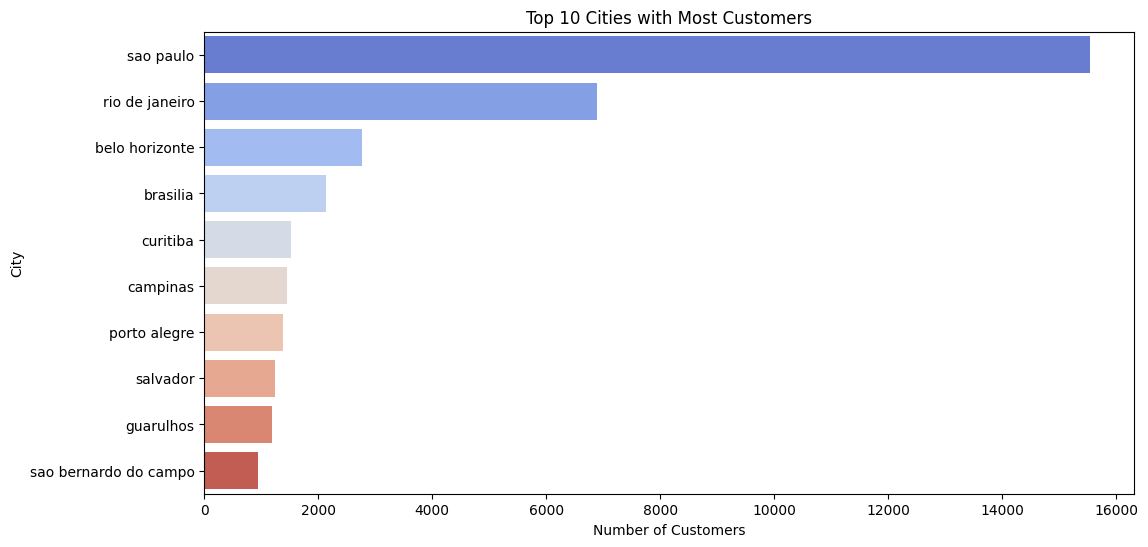

In [10]:
top_cities = df['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.title("Top 10 Cities with Most Customers")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()


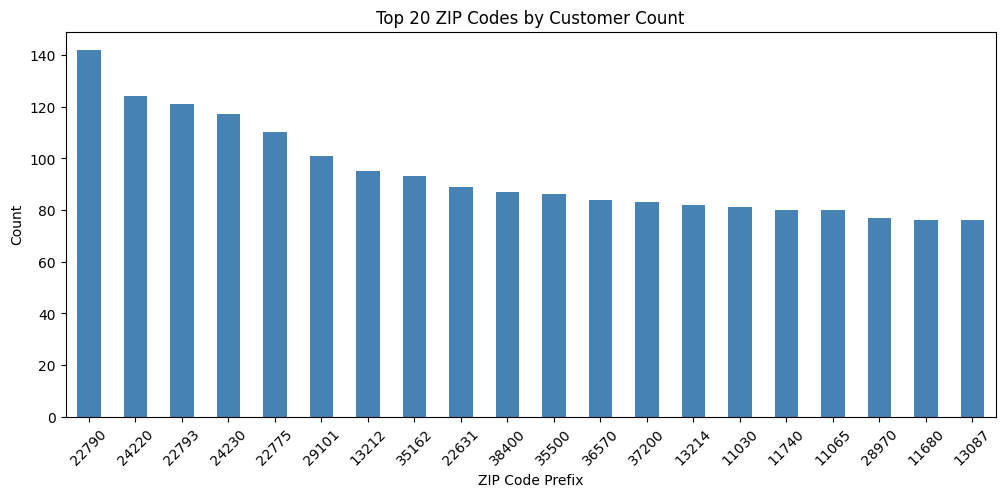

In [11]:
plt.figure(figsize=(12, 5))
df['customer_zip_code_prefix'].value_counts().head(20).plot(kind='bar', color='steelblue')
plt.title("Top 20 ZIP Codes by Customer Count")
plt.xlabel("ZIP Code Prefix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [13]:
df.isna().any()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

In [15]:
df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [16]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
df.shape

(99441, 5)

In [18]:
print("Total Customers:", df.shape[0])
print("Unique Customers:", df['customer_unique_id'].nunique())  # Unique customers
print("Duplicate customer IDs:", df.duplicated(subset=['customer_unique_id']).sum())


Total Customers: 99441
Unique Customers: 96096
Duplicate customer IDs: 3345


C:\Users\suman\AppData\Local\Temp\ipykernel_164\361198156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['customer_state'], order=df['customer_state'].value_counts().index, palette="coolwarm")


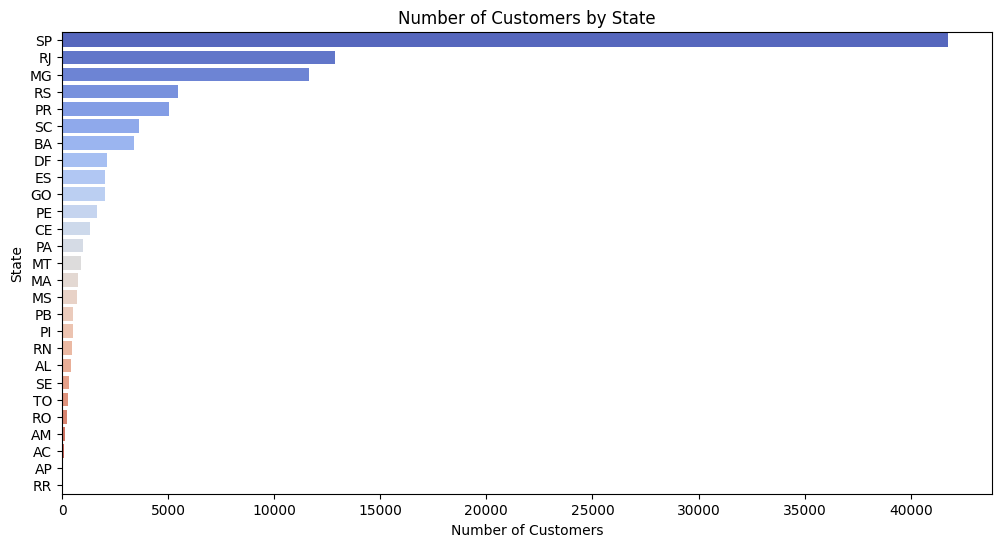

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=df['customer_state'], order=df['customer_state'].value_counts().index, palette="coolwarm")
plt.title("Number of Customers by State")
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.show()


C:\Users\suman\AppData\Local\Temp\ipykernel_164\4101918647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Customer Count", y="State", data=customer_counts, palette="magma")


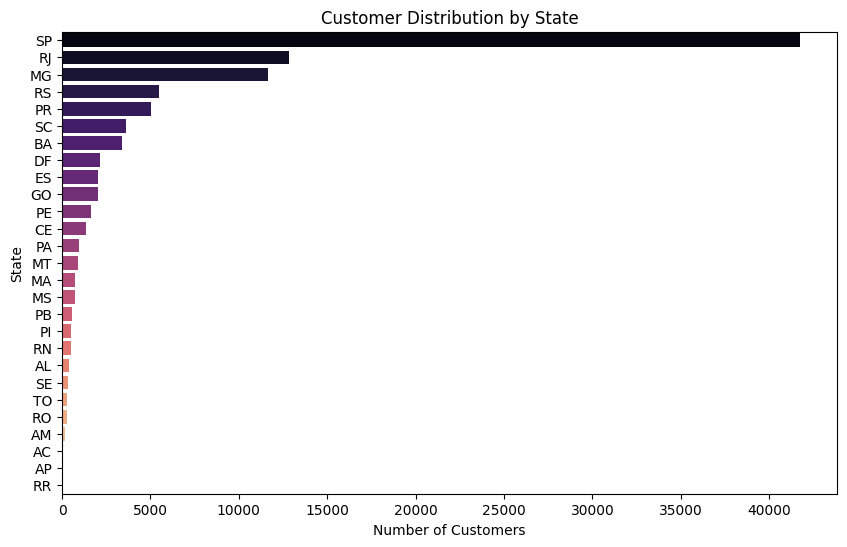

In [20]:
customer_counts = df["customer_state"].value_counts().reset_index()
customer_counts.columns = ["State", "Customer Count"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Customer Count", y="State", data=customer_counts, palette="magma")
plt.title("Customer Distribution by State")
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.show()


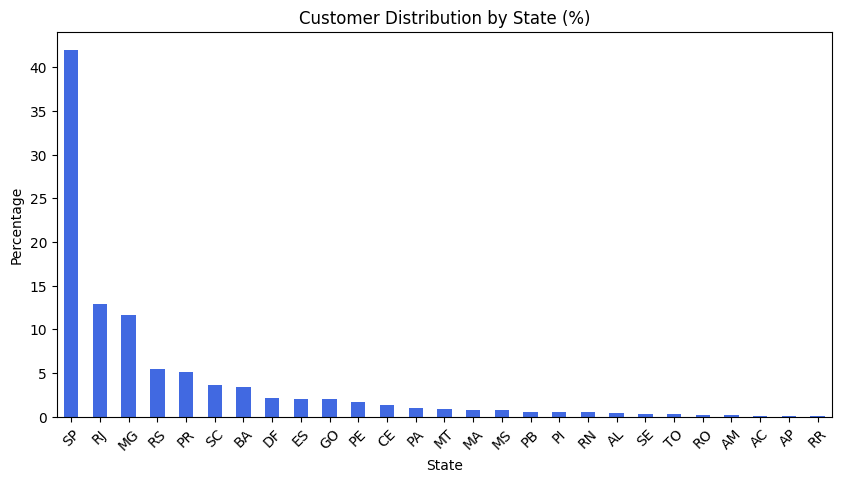

In [21]:
state_counts = df['customer_state'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))
state_counts.plot(kind='bar', color='royalblue')
plt.title("Customer Distribution by State (%)")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()


In [22]:
state_counts = df['customer_state'].value_counts()
print("Customer Count Per State:\n", state_counts)


Customer Count Per State:
 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


In [23]:
top_cities = df['customer_city'].value_counts().head(10)
print("Top 10 Cities by Customer Count:\n", top_cities)


Top 10 Cities by Customer Count:
 customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


In [24]:
top_zip_codes = df['customer_zip_code_prefix'].value_counts().head(10)
print("Top 10 ZIP Codes by Customer Count:\n", top_zip_codes)


Top 10 ZIP Codes by Customer Count:
 customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: count, dtype: int64


In [25]:
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str).str.replace(',', '', regex=True)


In [26]:
# Convert ZIP Code Prefix to Numeric
df['customer_zip_code_prefix'] = pd.to_numeric(df['customer_zip_code_prefix'], errors='coerce', downcast="integer")
df['customer_id'] = pd.to_numeric(df['customer_id'], errors='coerce', downcast="integer")
df['customer_unique_id'] = pd.to_numeric(df['customer_unique_id'], errors='coerce', downcast="integer")


In [27]:
# Handling Missing (NaN) Values After Conversion
df.dropna(subset=['customer_zip_code_prefix'], inplace=True)  # Removes rows with NaN ZIP codes


In [28]:
df[df['customer_city'] == 'sao paulo']


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
2,NaN,NaN,1151,sao paulo,SP
6,NaN,NaN,4534,sao paulo,SP
13,NaN,NaN,5704,sao paulo,SP
18,NaN,NaN,5416,sao paulo,SP
22,NaN,NaN,5713,sao paulo,SP
...,...,...,...,...,...
99408,NaN,NaN,1521,sao paulo,SP
99411,NaN,NaN,4313,sao paulo,SP
99422,NaN,NaN,5734,sao paulo,SP
99423,NaN,NaN,1323,sao paulo,SP


In [29]:
df[df['customer_state'] == 'SP']


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,NaN,NaN,14409,franca,SP
1,NaN,NaN,9790,sao bernardo do campo,SP
2,NaN,NaN,1151,sao paulo,SP
3,NaN,NaN,8775,mogi das cruzes,SP
4,NaN,NaN,13056,campinas,SP
...,...,...,...,...,...
99432,NaN,NaN,13500,rio claro,SP
99434,NaN,NaN,7790,cajamar,SP
99436,NaN,NaN,3937,sao paulo,SP
99437,NaN,NaN,6764,taboao da serra,SP


In [30]:
df[df['customer_zip_code_prefix'] == 13056]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
4,NaN,NaN,13056,campinas,SP
2930,NaN,NaN,13056,campinas,SP
3222,NaN,NaN,13056,campinas,SP
3317,NaN,NaN,13056,campinas,SP
3745,NaN,NaN,13056,campinas,SP
5417,NaN,NaN,13056,campinas,SP
8639,NaN,NaN,13056,campinas,SP
11575,NaN,NaN,13056,campinas,SP
12241,NaN,NaN,13056,campinas,SP
13521,NaN,NaN,13056,campinas,SP


In [31]:
sao_paulo_data = df.loc[df['customer_city'] == 'sao paulo']


In [32]:
sp_customers = df.loc[df['customer_state'] == 'SP']
